## Practise

In [1]:
# Sentences

sen_1 = "I had a great time at the movie it was really funny"
sen_2 = "I had a great time at the movie but the parking was terrible"
sen_3 = "I had a great time at the movie but the parking wasn't great"
sen_4 = "I wanna watch a film"

### TextBlob

In [3]:
from textblob import TextBlob

In [5]:
print(sen_1)
sen_1_score = TextBlob(sen_1)
sen_1_score.sentiment.polarity

I had a great time at the movie it was really funny


0.525

In [6]:
print(sen_2)
sen_2_score = TextBlob(sen_2)
sen_2_score.sentiment.polarity

I had a great time at the movie but the parking was terrible


-0.09999999999999998

In [7]:
print(sen_3)
sen_3_score = TextBlob(sen_3)
sen_3_score.sentiment.polarity

I had a great time at the movie but the parking wasn't great


0.8

In [8]:
print(sen_4)
sen_4_score = TextBlob(sen_4)
sen_4_score.sentiment.polarity

I wanna watch a film


0.0

### pre-trained Transformer 

In [14]:
import transformers
from transformers import pipeline 
from tensorflow import keras

In [16]:
# sentiment_pipeline = pipeline('sentiment-analysis')
sentiment_pipeline = pipeline('sentiment-analysis', framework='pt')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [17]:
print(sen_1)
sentiment_pipeline(sen_1)

I had a great time at the movie it was really funny


[{'label': 'POSITIVE', 'score': 0.9998176693916321}]

In [18]:
print(sen_1)
sentiment_pipeline(sen_2)

I had a great time at the movie but the parking was terrible


[{'label': 'NEGATIVE', 'score': 0.9977464079856873}]

In [19]:
print(sen_3)
sentiment_pipeline(sen_3)

I had a great time at the movie but the parking wasn't great


[{'label': 'NEGATIVE', 'score': 0.9984902143478394}]

In [20]:
print(sen_4)
sentiment_pipeline(sen_4)

I wanna watch a film


[{'label': 'POSITIVE', 'score': 0.9959331154823303}]

In [22]:
# Choosing a specific model
specific_model = pipeline(
    'sentiment-analysis', 
    model='finiteautomata/bertweet-base-sentiment-analysis',
    framework='pt'
)

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

In [23]:
print(sen_1)
specific_model(sen_1)

I had a great time at the movie it was really funny


[{'label': 'POS', 'score': 0.9923490285873413}]

In [24]:
print(sen_2)
specific_model(sen_2)

I had a great time at the movie but the parking was terrible


[{'label': 'NEG', 'score': 0.5144566893577576}]

In [25]:
print(sen_3)
specific_model(sen_3)

I had a great time at the movie but the parking wasn't great


[{'label': 'POS', 'score': 0.6351572871208191}]

In [26]:
print(sen_4)
specific_model(sen_4)

I wanna watch a film


[{'label': 'POS', 'score': 0.6126288771629333}]

## Sentiment Analysis on Book Review

In [ ]:
import re
import numpy as np
import pandas as pd
import transformers
from transformers import pipelines
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [35]:
data = pd.read_csv('./datasets/book_reviews_sample.csv')
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [38]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [42]:
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"[^\w\s]", "", x['reviewText'].lower()), axis=1)
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


### Using Vader

In [44]:
vader_sentiment = SentimentIntensityAnalyzer()

In [ ]:
data['vadar_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

In [55]:
data.head()

,index,reviewText,rating,reviewText_clean,vadar_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [58]:
bins = [-1, -0.1, 0.1, 1]
names = ['negaitve', 'neutral', 'positive']

data['vader_sentiment_label'] = pd.cut(data['vadar_sentiment_score'], bins, labels=names)
data.head()

,index,reviewText,rating,reviewText_clean,vadar_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,positive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,positive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,positive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,positive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negaitve


<Axes: xlabel='vader_sentiment_label'>

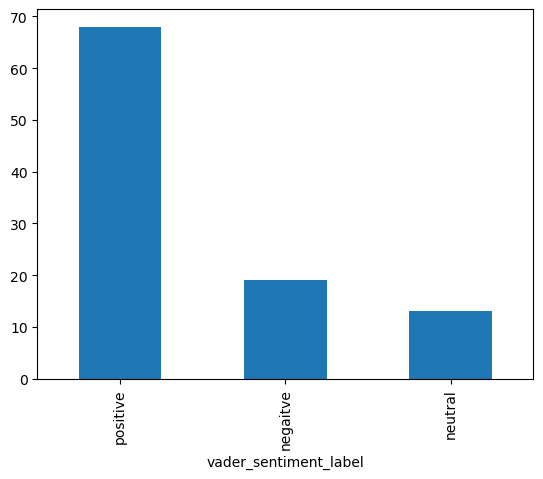

In [63]:
data['vader_sentiment_label'].value_counts().plot.bar()

### Using Transformer

In [64]:
# Choosing a specific model
specific_model = pipeline(
    'sentiment-analysis', 
    model='finiteautomata/bertweet-base-sentiment-analysis',
    framework='pt'
)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [83]:
transformers_labels = []

for review in data['reviewText_clean'].values:
    sentiment_list = specific_model(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformers_labels.append(sentiment_label)

In [85]:
data['transformer_sentiment_label'] = transformers_labels

<Axes: xlabel='transformer_sentiment_label'>

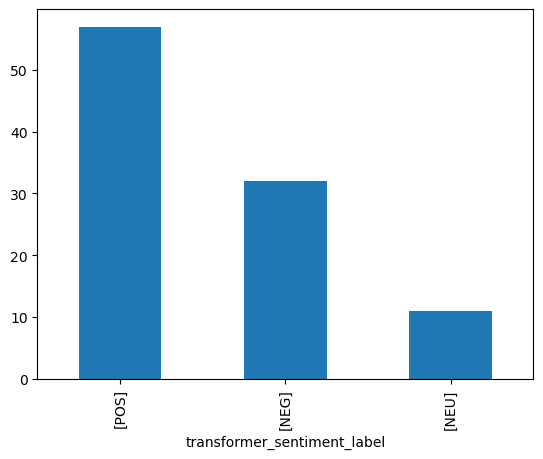

In [86]:
data['transformer_sentiment_label'].value_counts().plot.bar()